### 1. Data Prep

In [1]:
import pandas as pd
import numpy as np
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /home/codespace/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [2]:
df = pd.read_csv('/home/codespace/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
categorical_columns = list(df.dtypes[df.dtypes.values == "object"].index)

In [5]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [6]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [7]:
df.totalcharges = df.totalcharges.fillna(0)

In [8]:
df['churn'] = np.where(df['churn'] == 'no', 0, 1)

### 2. Validation Framework

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [11]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [12]:
df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [13]:
y_train = df_train.churn.values
y_test = df_test.churn.values
y_val = df_val.churn.values

In [14]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

### 3. EDA

In [15]:
numerical = ['totalcharges', 'monthlycharges', 'tenure']

In [16]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
               'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling','paymentmethod']

In [17]:
numeric_variables = list(df_full_train.dtypes[df_full_train.dtypes.values == "int"].index)

In [18]:
numeric_variables

['seniorcitizen', 'tenure', 'churn']

### 4. Feature Importance

In [19]:
df_full_train[df_full_train.gender=='male'].churn.mean()
df_full_train[df_full_train.gender=='female'].churn.mean()

np.float64(0.27682403433476394)

In [20]:
df_full_train.groupby(by='gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [21]:
df_gender_group = df_full_train.groupby(by='gender').churn.agg(['mean'])
df_gender_group['diff'] = df_gender_group['mean'] - df_full_train.churn.mean()
df_gender_group['risk'] = df_gender_group['mean'] / df_full_train.churn.mean()

In [22]:
from IPython.display import display

In [23]:
for c in categorical_columns:
    print(c)
    df_group = df_full_train.groupby(by=c).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - df_full_train.churn.mean()
    df_group['risk'] = df_group['mean'] / df_full_train.churn.mean()
    display(df_group)
    print()
    print(20 * '#')

customerid


,mean,diff,risk
customerid,,,
0002-orfbo,0.0,-0.269968,0.000000
0004-tlhlj,1.0,0.730032,3.704142
0011-igkff,1.0,0.730032,3.704142
0013-exchz,1.0,0.730032,3.704142
0013-mhzwf,0.0,-0.269968,0.000000
...,...,...,...
9987-lutyd,0.0,-0.269968,0.000000
9992-rramn,1.0,0.730032,3.704142
9992-ujoel,0.0,-0.269968,0.000000



####################
gender


,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980



####################
partner


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472



####################
dependents


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651



####################
phoneservice


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412



####################
multiplelines


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948



####################
internetservice


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201



####################
onlinesecurity


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570



####################
onlinebackup


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660



####################
deviceprotection


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480



####################
techsupport


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390



####################
streamingtv


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328



####################
streamingmovies


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182



####################
contract


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730



####################
paperlessbilling


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560



####################
paymentmethod


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121



####################
totalcharges


,mean,diff,risk
totalcharges,,,
0.00,0.0,-0.269968,0.000000
18.80,0.0,-0.269968,0.000000
18.85,0.5,0.230032,1.852071
18.90,0.0,-0.269968,0.000000
19.00,0.0,-0.269968,0.000000
...,...,...,...
8547.15,0.0,-0.269968,0.000000
8564.75,0.0,-0.269968,0.000000
8594.40,0.0,-0.269968,0.000000



####################
churn


,mean,diff,risk
churn,,,
0,0.0,-0.269968,0.000000
1,1.0,0.730032,3.704142



####################


### 5. Feature Importance: Mutual Information

In [24]:
from sklearn.metrics import mutual_info_score

In [25]:
def mutual_info_churn(series):
    return mutual_info_score(df_full_train.churn, series)

In [26]:
mi = df_full_train[categorical].apply(mutual_info_churn)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### 6. Feature Importance: Correlation for numerical variables

In [27]:
df_full_train[numerical].corrwith(df_full_train.churn)

totalcharges     -0.196353
monthlycharges    0.196805
tenure           -0.351885
dtype: float64

### 7. One-hot encoding
Preparing feature matrices for training

In [28]:
from sklearn.feature_extraction import DictVectorizer

In [29]:
dv = DictVectorizer(sparse=False)

In [30]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
test_dicts = df_test[categorical + numerical].to_dict(orient='records')

Why do we fit_transform **only on training** but transform only val and test data?

When `DictVectorizer` calls `fit`, it learns the vocabulary—specifically, it creates a mapping of all unique category values to column indices. For example, if your training data has `color: [red, blue, green]`, it creates columns 0, 1, 2 for those values.

If you call `fit_transform` on your validation or test set separately, two problems occur:

1. **Different column ordering**: The test set might encounter categories in a different order, creating a different column arrangement. Column 0 might be "blue" instead of "red".

2. **Missing or extra categories**: Your test set might not have "green" at all (so no column for it), or might have "yellow" (creating a new column that didn't exist in training). Now your model trained on 3 columns receives data with 2 or 4 columns.

Using `transform` only (without `fit`) forces the test data into the exact same structure learned from training. Unknown categories get ignored, and missing categories get zero values—but the column structure stays consistent with what the model expects.

In [31]:
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

### 8. Logistic Regression

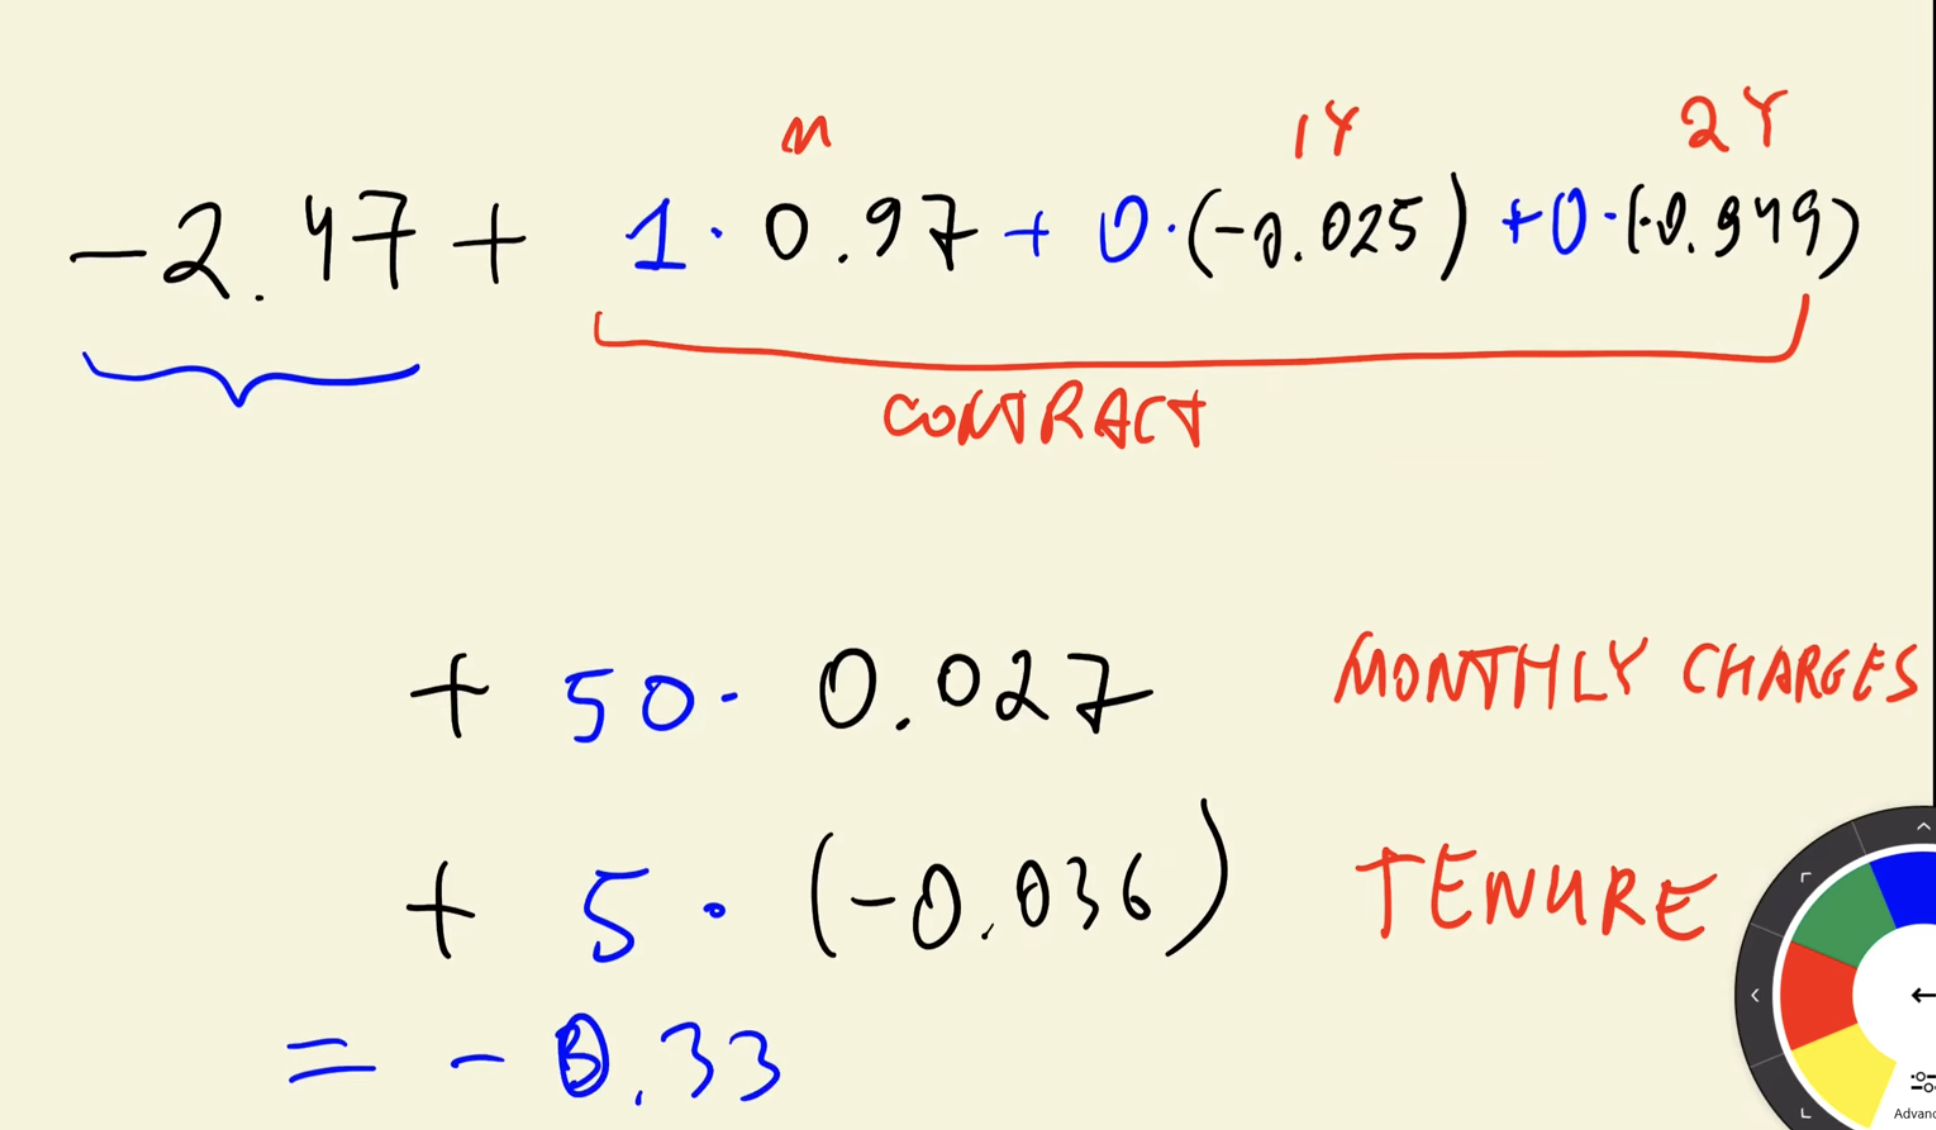

The raw output is coming from w0 + w(X).

The raw output (e.g. -0.33) is in log-odds space, which ranges from -∞ to +∞. That's not interpretable as a probability.
Sigmoid squashes any number into the 0-1 range, giving you an actual probability. Your -0.33 becomes 0.418, meaning "this customer has a 41.8% chance of churning."

Starting with  log-odds value: **z = -0.33**

---

**Log-odds → Probability (sigmoid)**

$$p = \frac{1}{1 + e^{-z}} = \frac{1}{1 + e^{-(-0.33)}} = \frac{1}{1 + e^{0.33}} = \frac{1}{1 + 1.391} = \frac{1}{2.391} = 0.418$$

---

**Probability → Log-odds (logit) — the reverse**

$$z = \ln\left(\frac{p}{1-p}\right) = \ln\left(\frac{0.418}{1-0.418}\right) = \ln\left(\frac{0.418}{0.582}\right) = \ln(0.718) = -0.33$$

---

They're inverse functions. The model outputs -0.33 (log-odds), sigmoid converts it to 0.418 (probability), and logit would convert it right back.

In [32]:
# make the number between 0 and 1
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression(max_iter=5000)

In [35]:
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [36]:
model.predict(X_val)

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [37]:
model.predict_proba(X_val) # left col is prob of not churn, right is prob of churn which is what we are interested in

array([[0.99333409, 0.00666591],
       [0.7951737 , 0.2048263 ],
       [0.78229605, 0.21770395],
       ...,
       [0.84843993, 0.15156007],
       [0.21129582, 0.78870418],
       [0.18808166, 0.81191834]], shape=(1409, 2))

In [38]:
y_predict = model.predict_proba(X_val)[:,1]

In [39]:
churn_decisions = (y_predict >= 0.5)

In [40]:
df_val[churn_decisions].customerid # customers that possibly churn

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 315, dtype: object

In [41]:
(y_val == churn_decisions).mean()

np.float64(0.8034066713981547)

In [53]:
from sklearn.metrics import root_mean_squared_error

In [43]:
y_pred = model.predict(X_test)
root_mean_squared_error(y_test, y_pred)

0.4336780489100855

### 9. Model Interpretation

In [ ]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))